In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

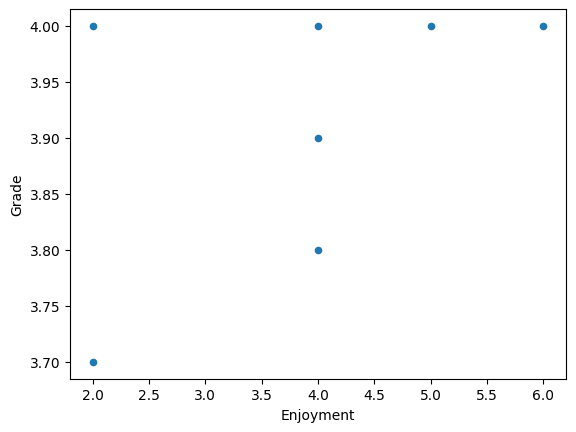

In [2]:
data = pd.DataFrame([[6, 4], [5, 4], [4, 3.8], [4, 3.9], [2, 3.7], [2, 4], [4, 4]], columns=['Enjoyment', 'Grade'])

data.plot.scatter(x='Enjoyment', y='Grade')

data = [[6., 4.], [5., 4.], [4., 3.8], [4., 3.9], [2., 3.7], [2., 4.], [4., 4.]]

In [3]:
def distance(point1, point2):
    # Euclidean distance
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

def most_similar(cluster):
    # Find the most similar point in the cluster
    return min(cluster, key=lambda point: distance(point, cluster[0]))

In [66]:
def kmeans(data, n_clusters, rounds=10):
    centroids = random.choices(data, k=n_clusters)
    for _ in range(rounds):
        clusters = {c: [] for c in range(n_clusters)}
        for point in data:
            min_distance = distance(point, centroids[0])
            min_centroid = centroids[0]

            for centroid in centroids[1:]:
                if distance(point, centroid) < min_distance:
                    min_distance = distance(point, centroid)
                    min_centroid = centroid
            
            clusters[centroids.index(min_centroid)].append(point)
        for key, points in clusters.items():
            if len(points) == 0:
                continue
            points = np.array(points)
            plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {key}')

        centroid_array = np.array(centroids)
        plt.scatter(centroid_array[:, 0], centroid_array[:, 1], marker='x', color='black')
        plt.xlabel('Enjoyment')
        plt.ylabel('Grade')
        plt.title('K-Means Clustering')
        plt.show()
        
        for key, centroid in enumerate(centroids):
            centroids[key] = np.mean(np.array(clusters[key]), axis=0).tolist()
        
        plt.figure()

        

    return clusters

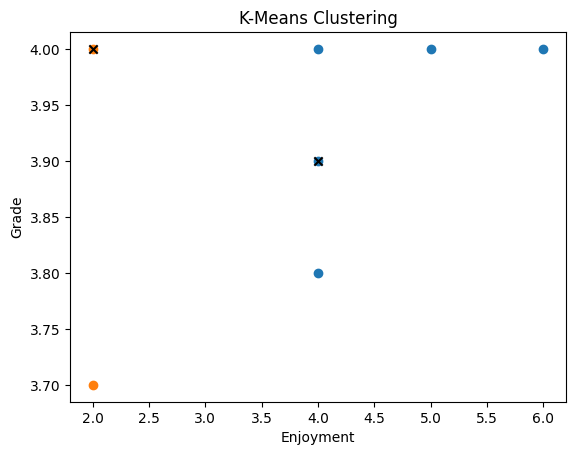

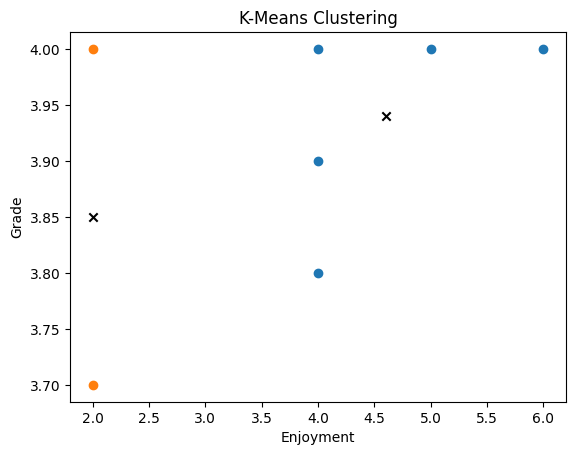

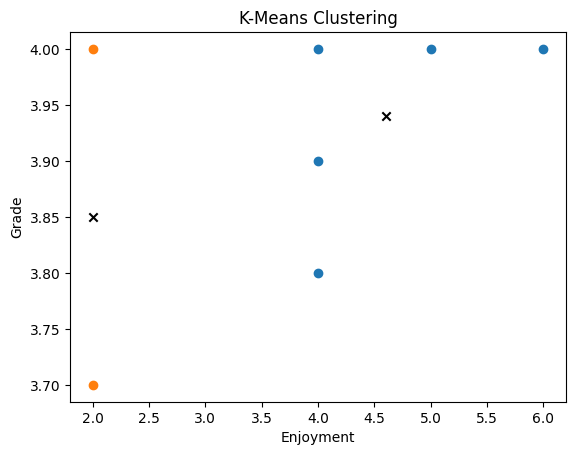

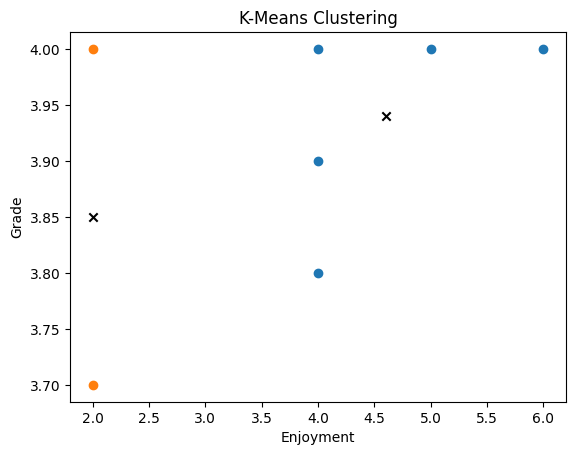

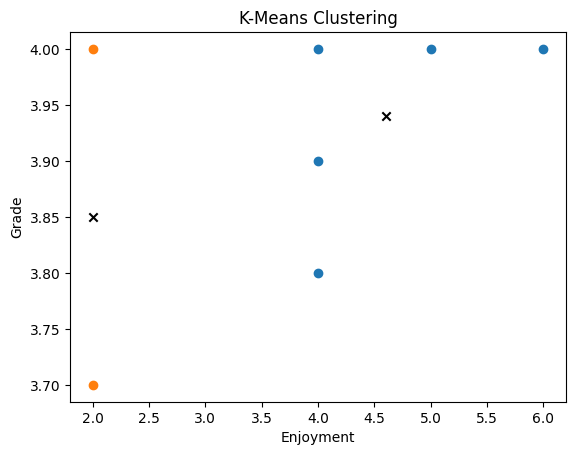

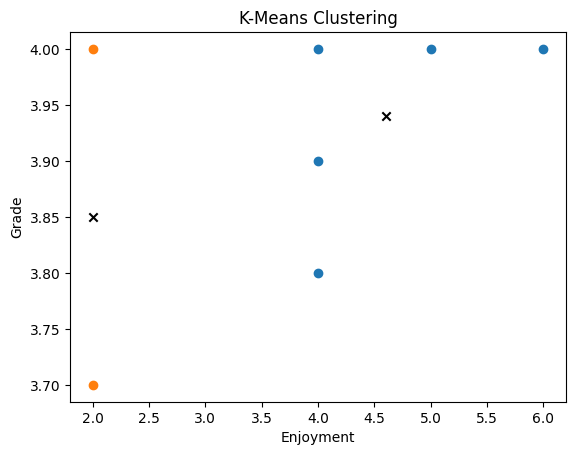

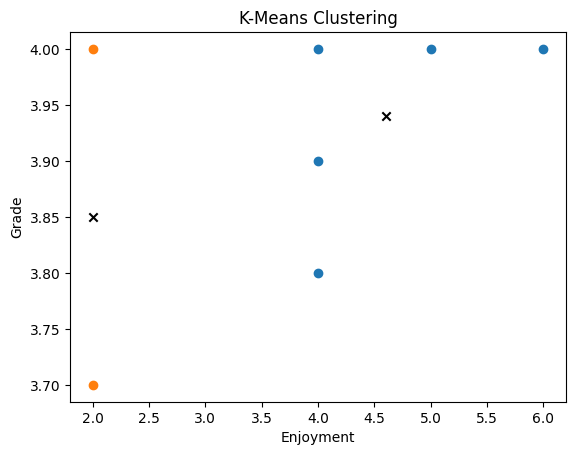

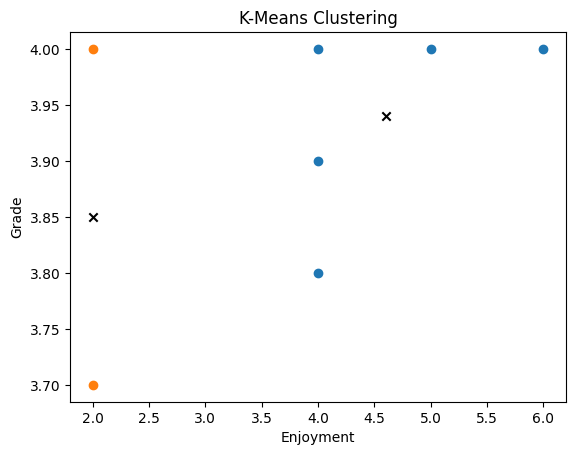

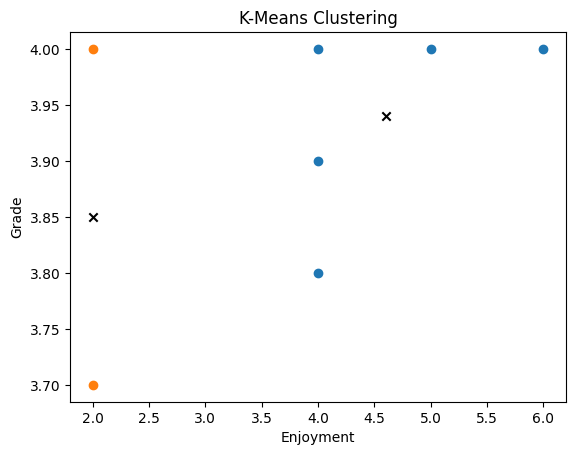

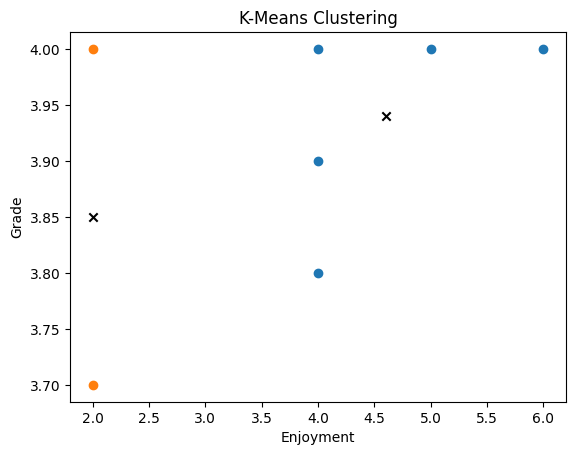

{0: [[6.0, 4.0], [5.0, 4.0], [4.0, 3.8], [4.0, 3.9], [4.0, 4.0]],
 1: [[2.0, 3.7], [2.0, 4.0]]}

<Figure size 640x480 with 0 Axes>

In [73]:
kmeans(data, 2)